In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [55]:
data = pd.read_csv('../data/coin_Bitcoin.csv')

In [56]:
data["Target"] = data["Open"].shift(-1)
data = data.loc[~(data == 0).any(axis=1)]
data.dropna(inplace=True)
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Target
242,243,Bitcoin,BTC,2013-12-27 23:59:59,777.510010,713.599976,763.280029,735.070007,46862700.0,8.955395e+09,737.979980
243,244,Bitcoin,BTC,2013-12-28 23:59:59,747.059998,705.349976,737.979980,727.830017,32505800.0,8.869919e+09,728.049988
244,245,Bitcoin,BTC,2013-12-29 23:59:59,748.609985,714.440002,728.049988,745.049988,19011300.0,9.082104e+09,741.349976
245,246,Bitcoin,BTC,2013-12-30 23:59:59,766.599976,740.239990,741.349976,756.130005,20707700.0,9.217168e+09,760.320007
246,247,Bitcoin,BTC,2013-12-31 23:59:59,760.580017,738.169983,760.320007,754.010010,20897300.0,9.191325e+09,754.969971


In [57]:
data.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap,Target
count,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2.748000e+03,2.748000e+03,2748.000000
mean,1616.500000,7467.264932,7027.061425,7258.734897,7270.463303,1.186111e+10,1.310721e+11,7270.729159
std,793.423594,11960.147786,11161.219173,11594.696926,11604.511056,1.941327e+10,2.168053e+11,11605.018626
min,243.000000,211.731003,171.509995,176.897003,178.102997,2.857830e+06,2.444379e+09,176.897003
25%,929.750000,507.384750,482.783501,494.684242,494.698242,4.871180e+07,6.944624e+09,494.684242
50%,1616.500000,3738.418961,3618.869528,3665.119053,3668.992028,2.213255e+09,6.402895e+10,3671.477973
75%,2303.250000,9163.506387,8721.523733,8910.320640,8909.852796,1.756885e+10,1.589485e+11,8912.601295
max,2990.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12,63523.754869


In [58]:
data.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Target
2985,2986,Bitcoin,BTC,2021-07-01 23:59:59,35035.982712,32883.781226,35035.982712,33572.117653,3.783896e+10,6.293393e+11,33549.600177
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11,33854.421362
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11,34665.564866
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11,35284.344430
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11,33723.509655


In [59]:
if 'Date' in data.columns:
	data['Date'] = pd.to_datetime(data['Date'])
	data.set_index('Date', inplace=True)

features = ['Open', 'Close', 'High', 'Low', 'Volume']  
target = 'Target'

X = data[features]
y = data[target]

In [60]:
split_point = int(len(data) * 0.7)  # 70% train, 15% validation, 15% test
X_train = X.iloc[:split_point]
y_train = y.iloc[:split_point]
X_val = X.iloc[split_point:split_point + int(len(data) * 0.15)]
y_val = y.iloc[split_point:split_point + int(len(data) * 0.15)]
X_test = X.iloc[split_point + int(len(data) * 0.15):]
y_test = y.iloc[split_point + int(len(data) * 0.15):]

In [61]:
model = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [62]:
y_val_pred = model.predict(X_val)

In [64]:
y_val_pred = pd.Series(y_val_pred, index=y_val.index)

y_val.to_csv('y_val.csv')
y_val_pred.to_csv('y_val_pred.csv')

In [48]:
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation MSE: {val_mse}")
print(f"Validation R^2: {val_r2}")

Validation MSE: 4906.399769220249
Validation R^2: 0.99834240781313


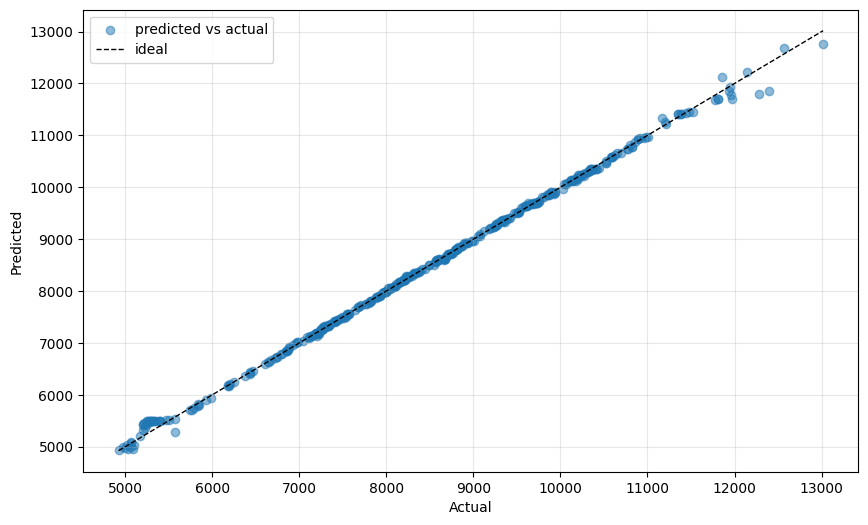

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.5, label='predicted vs actual')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=1, label='ideal')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
import requests

url = "https://api.coindesk.com/v1/bpi/currentprice.json"

payload = {}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

if response.status_code == 200:
    data = response.json()
    #bpi = data['bpi']['USD']['rate_float']
    #print(f"Bitcoin price: {bpi}")
    #X_new = pd.DataFrame({'Open': [bpi], 'High': [bpi], 'Low': [bpi], 'Volume': [bpi]})
    #y_new = model.predict(X_new)
    #print(f"Predicted price: {y_new[0]}")

#i need a new api to find volume, high and low